## Multivariate Stochastic Linear Regression


### Execução
O programa abaixo quando executado fará a regressão linear do dataset bike_sharing.csv e retornará a média dos erros quadráticos da regressão e a respectiva matriz de pesos. Para efeito de comparação, será retornado também a média dos erros quadráticos da implementaçao do SKLEARN.

Por padrão o algoritmo é o estocástico e a normalização não será feita (na discussão abaixo tem um detalhamento). 
O conjunto de treino tem 70% dos registros e o outros 30% foram utilizados para teste (predição). 
O dataset é randomizado a cada execução do algoritmo. 

Se necessário, na função ```main``` existem dois parâmetros ```s_alpha``` e ```s_epochs``` que são respectivamente a taxa de aprendizado alfa e o número de iterações (épocas), podendo ser ajustadas a escolha do usuário. 

Na inicilização do objeto da classe LR (classe que foi implementada que realiza a regressão), pode-se especificar dois parâmetros ```algorithm``` e ```normalize```. Os valores padrão são ```algorithm ='stochastic'``` e ```normalize = False```, sendo possível a mudança para ```algorithm ='batch'``` e ```normalize = True``` se o usuário desejar mudar o algoritmo para batch ou para normalizar os dados. Convém lembrar que ao mudar o algoritmo ou a normalização, é necessário ajustar os parâmetros ```s_alpha``` e ```s_epochs```. O gráfico que foi gerado após a regressão pode ajudar a ajustar esses parâmetros como discutido abaixo.

### Discussão
Os parâmetros alfa e número de iterações foram encontrados a partir da execução do programa para vários valores dos mesmos e analisando o gráfico do custo total pelo número de iterações. O algoritmo também foi comparado com a implementação do SKLEARN. Os resultados foram os seguintes:

    Para os dados não-normalizados, com um alfa = 0.000001, a regressão linear converge bem em apenas uma iteração. Para chegar a essa conclusão, foi analisado o gráfico mencionado acima com até 50 iterações para verificar em qual iteração a regressão tendia a convergência. Se o valor de alfa aumentar, a regressão não vai convergir. O valor do score é bem próximo da implementação original do SKLEARN.

    Para os dados normalizados, a situação foi diferente. Com um alfa = 0.0001, a regressão converge bem em pelo menos 10 iterações, porém o score é geralmente um pouco maior que a implementação do SKLEARN. Se o alfa aumentar, a regressão não converge. Se diminuir, são necessárias mais iterações, por exemplo, com um alfa = 0.00001 são necessárias pelo menos 50 iterações para se perceber a convergência.


Os valores dos pesos da regressão mostram a importância de cada atributo na predição. Nesse caso os valores dos pesos tendem a serem baixos e parecidos, da ordem de $10^{-2}$, então podemos concluir que os atributos tendem a ter uma importância quase igual.

Mean squared error of SKLEARN regression: 64.640289



Mean squared error of Leo's stochastic regression (alpha=0.000001, epochs=1): 64.868324

 Weights matrix
[  4.08905624e-03   1.15412429e-02   3.86366194e-03   2.36214067e-02
   6.31769394e-02   4.11751919e-06   1.07896817e-02   9.79378392e-04
   2.84474765e-03   4.43785775e-03  -4.45028766e-04   1.20792060e-03
  -1.15809876e-03   1.00194864e+00   9.94599931e-01]


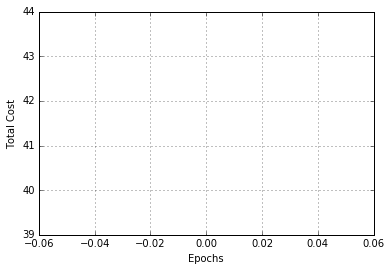

In [43]:
%matplotlib inline
import numpy as np
import math
import scipy.stats as ss
# from bokeh.plotting import figure, output_file, show, save
from sklearn import linear_model
from sklearn.preprocessing import Normalizer, MinMaxScaler
from pylab import *

# import warnings
# warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


class LR:

    predictions = []
    weights = []
    cost = []

    def __init__(self, alpha, epochs, algorithm='stochastic', normalize=True):
        self.alpha = alpha
        self.epochs = epochs
        self.algorithm = algorithm
        self.normalize = normalize

    def add_column_of_ones(self, X):
        rows = len(X)
        arrayOfOnes = np.ones(rows)
        X = np.c_[arrayOfOnes, X]  # add column of ones
        return X

    def normalization(self, X):
        # scaler = MinMaxScaler()
        # scaler.fit(X)
        # X = scaler.transform(X)
        X = ss.zscore(X)
        return X

    def predict(self, X):
        if self.normalize:
            X = self.normalization(X)
        X = self.add_column_of_ones(X)
        self.predictions = X.dot(self.weights)
        return self.predictions

    def r_squared(self, X, y, weights):
        return np.sum(np.power((X.dot(weights) - y), 2)) / (2 * len(X))

    def fit(self, X, y):
        if self.algorithm == 'stochastic':
            self.stochastic(X,y)
        elif self.algorithm == 'batch':
            self.batch(X, y)
        else:
            pass

    def stochastic(self, X, y):
        if self.normalize:
            X = self.normalization(X)
        X = self.add_column_of_ones(X)
        size, features = X.shape
        weights = np.zeros(features)
        cost = np.zeros(self.epochs)

        for i in range(self.epochs):
            for index, row in enumerate(X):
                error = row.dot(weights) - y[index]
                weights = weights - self.alpha * error * row
            cost[i] = self.r_squared(X, y, weights)

        self.weights = weights[:]
        self.cost = cost[:]

    def batch(self, X, y):
        if self.normalize:
            X = self.normalization(X)
        X = self.add_column_of_ones(X)
        size, features = X.shape
        weights = np.zeros(features)
        cost = np.zeros(self.epochs)

        for i in range(self.epochs):
            error = X.dot(weights) - y
            weights = weights - (self.alpha/size)*error.dot(X)
            cost[i] = self.r_squared(X, y, weights)

        self.weights = weights[:]
        self.cost = cost[:]


def get_data():

    # load data
    data = np.loadtxt("bike_sharing.csv", delimiter=",", skiprows=1)

    # randomize rows and split features from labels
    ndata = np.random.permutation(data)
    columns = ndata.shape[1]
    nt = int(math.floor(len(ndata) * 0.7))
    trainingFeatures = ndata[0:nt, 0:columns - 1]
    trainingLabels = ndata[0:nt, -1]
    testFeatures = ndata[nt:, 0:columns - 1]
    testLabels = ndata[nt:, -1]

    return trainingFeatures, trainingLabels, testFeatures, testLabels


def main():
    trainingFeatures, trainingLabels, testFeatures, testLabels = get_data()

    # SKLEARN LINEAR REGRESSION
    regr = linear_model.LinearRegression(normalize=False)
    regr.fit(trainingFeatures, trainingLabels)
#     print regr.intercept_
#     print regr.coef_
    print("Mean squared error of SKLEARN regression: %f"
          % np.mean((regr.predict(testFeatures) - testLabels) ** 2))
    print '\n\n'

    # LEO's LINEAR REGRESSION
    s_alpha = 0.000001
    s_epochs = 1
    stochastic_regression = LR(s_alpha, s_epochs, algorithm='stochastic', normalize=False)
    stochastic_regression.fit(trainingFeatures, trainingLabels)
    print("Mean squared error of Leo's stochastic regression (alpha=%f, epochs=%d): %f"
              % (s_alpha,  s_epochs, np.mean((stochastic_regression.predict(testFeatures) - testLabels) ** 2)))
    print '\n Weights matrix'
    print stochastic_regression.weights


    # Graph cost vs epochs
#     it = np.arange(s_epochs)
#     p = figure(x_axis_label='Epochs', y_axis_label='Cost')
#     p.line(it, stochastic_regression.cost, line_width=2)
#     show(p)

    it = np.arange(s_epochs)
    plot(it, stochastic_regression.cost)
    xlabel('Epochs')
    ylabel('Total Cost')
    grid(True)
    show()

    # b_alpha = 0.01
    # b_epochs = 500
    # batch_regression = LR(b_alpha, b_epochs)
    # batch_regression.batch(trainingFeatures, trainingLabels)
    # print batch_regression.weights
    # print("Mean squared error batch regression (alpha=%f, epochs=%d): %f"
    #       % (b_alpha, b_epochs, np.mean((batch_regression.predict(testFeatures) - testLabels) ** 2)))
    #
    # it = np.arange(b_epochs)
    # a = figure(x_axis_label='Iterations', y_axis_label='Cost')
    # a.line(it, batch_regression.cost, line_width=2)
    # show(a)


if __name__ == "__main__":
    main()

    
